In [ ]:
import polars as pl

In [ ]:
df = pl.read_csv("../data/filtered/movies.csv")
df.head()

movie_id,original_id,name,date,tagline,description,minute,theatrical_release_age_rating,rating
i64,i64,str,i64,str,str,i64,str,f64
0,1000001,"""Barbie""",2023,"""She's everything. He's just Ke…","""Barbie and Ken are having the …",114,"""PG-13""",3.86
1,1000004,"""Fight Club""",1999,"""Mischief. Mayhem. Soap.""","""A ticking-time-bomb insomniac …",139,"""R""",4.27
2,1000006,"""Oppenheimer""",2023,"""The world forever changes.""","""The story of J. Robert Oppenhe…",181,"""R""",4.23
3,1000008,"""Joker""",2019,"""Put on a happy face.""","""During the 1980s, a failed sta…",122,"""R""",3.85
4,1000010,"""Pulp Fiction""",1994,"""Just because you are a charact…","""A burger-loving hit man, his p…",154,"""R""",4.26


In [13]:
df.row(1)

(1,
 1000004,
 'Fight Club',
 1999,
 'Mischief. Mayhem. Soap.',
 'A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.',
 139,
 'R',
 4.27)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution(df, column):
    target_column = df[column].to_numpy()

    plt.figure(figsize=(10, 6))
    plt.hist(target_column, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Movie {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)

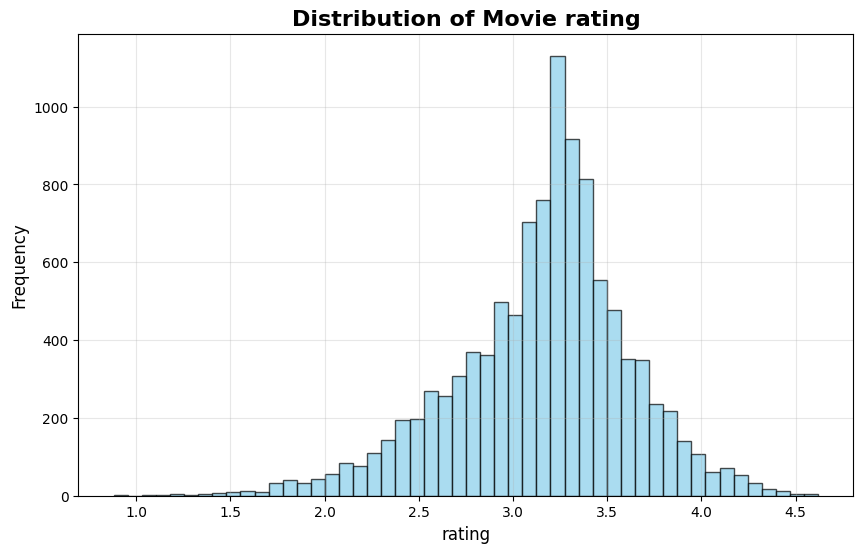

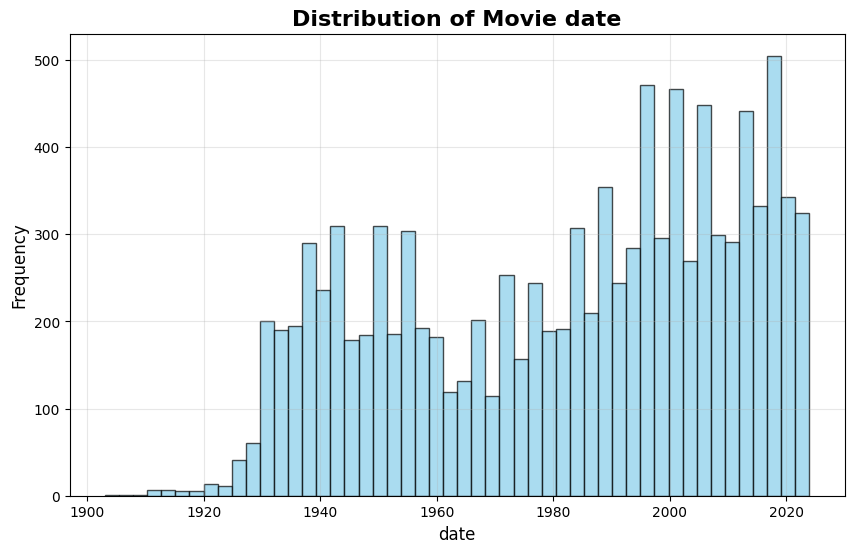

In [35]:
plot_distribution(df, 'rating')
plot_distribution(df, 'date')

In [30]:
YEAR_CUTOFF = 2015

In [31]:
print (f"Number of movies after {YEAR_CUTOFF}: {df['date'].gt(YEAR_CUTOFF).sum()}")
print (f"Mean of movies after {YEAR_CUTOFF}: {df.filter(pl.col('date') > YEAR_CUTOFF)['rating'].mean()}")
print (f"Mean of movies before {YEAR_CUTOFF}: {df.filter(pl.col('date') < YEAR_CUTOFF)['rating'].mean()}")

Number of movies after 2015: 1350
Mean of movies after 2015: 2.933303703703702
Mean of movies before 2015: 3.1900692764460086


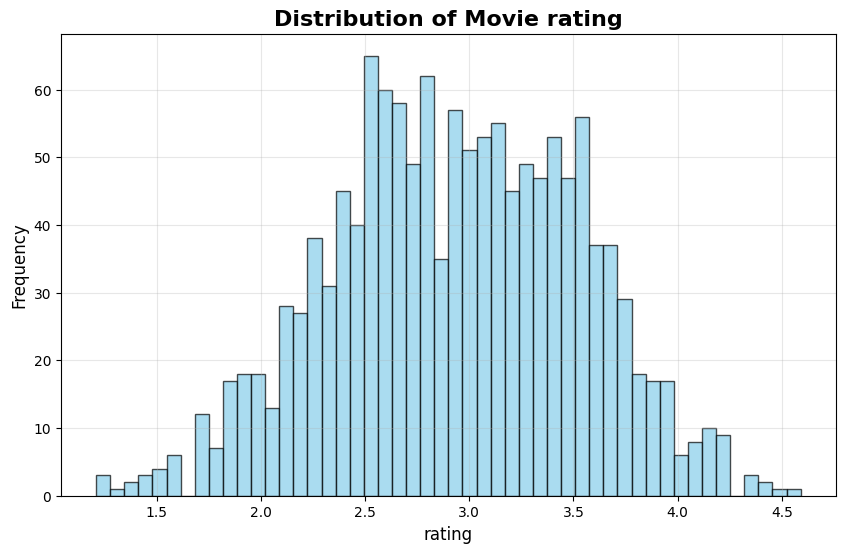

In [32]:
plot_distribution(df.filter(pl.col('date') > YEAR_CUTOFF), 'rating')

In [36]:
unique_values = df['theatrical_release_age_rating'].unique().sort()
print("Unique age ratings:")
print(unique_values)

Unique age ratings:
shape: (7,)
Series: 'theatrical_release_age_rating' [str]
[
	null
	"G"
	"NC-17"
	"NR"
	"PG"
	"PG-13"
	"R"
]


In [38]:
correlations = df.select([
    pl.corr('rating', 'date').alias('rating_date_corr')
])

print(correlations)


shape: (1, 1)
┌──────────────────┐
│ rating_date_corr │
│ ---              │
│ f64              │
╞══════════════════╡
│ -0.347576        │
└──────────────────┘


### EDA conclusion:
- imbalanced dataset with dominance of 3.-3.5 ratings
- **after cut off year (2015)** there is enough new movies with various ratings that would make use for validation dataset as we want to predict ratings of NEW movies, not just any movie from the past
- no information about how many users rated movie, which explains that probably older movies are viewed by a broader audience and have slightly higher mean rating
- need to fill None values for release age rating

# XGBoost model

[CatBoost](https://github.com/catboost/catboost) is selected for implementation as it natively supports both numerical and Categorical features to make preprocessing and handling easy to use and prototype, also easier to install than LightGBM.

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X = df.drop('rating', axis=1)
y = df['target']

# Identify categorical features
categorical_features = ['']
numerical_features = ['age', 'income', 'experience', 'credit_score']

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")


In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Basic CatBoost model
print("\n3. Training basic CatBoost model...")

# CatBoost automatically handles categorical features
model_basic = CatBoostRegressor(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=False
)

# Fit model - CatBoost will automatically detect categorical features
model_basic.fit(X_train, y_train, cat_features=categorical_features)